    No     Name  Accuracy  ReactionTime  Cluster
0    1   FARHIN      98.1          1.71        2
1    2     URMI     100.0          1.64        2
2    3     FIHA      90.1          1.99        2
3    4    MISTY      97.0          1.81        2
4    5    TITHI      93.1          1.81        2
5    6   FAHIMA      95.4          1.68        2
6    7   NAIMUR      98.5          1.37        2
7    8   HAMEEM      97.5          1.49        2
8    9    RIJON      97.8          0.97        2
9   10     SANI      94.9          1.52        2
10  11     SUMU      90.7          1.53        2
11  12     ARPA     100.0          1.77        2
12  13   RADIBA      98.1          3.34        0
13  14    AISHI      34.3          1.68        1
14  15    NAZIA      99.1          1.66        2
15  16     FIFI      98.9          1.97        2
16  17  SHAHRIN      99.1          1.69        2
17  18   RAHMAN      99.3          1.29        2
18  19   SHANNI      97.8          1.01        2
19  20    SADIA     

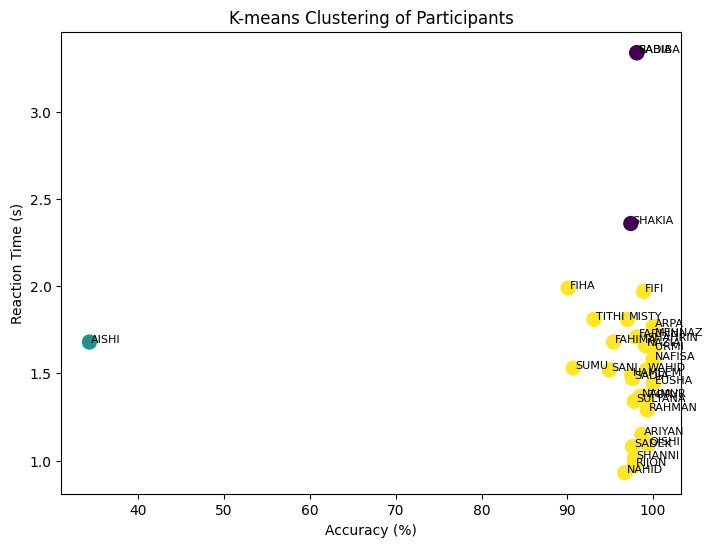

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ---- Step 1: Create dataset ----
data = {
    "No": list(range(1, 33)),
    "Name": [
        "FARHIN","URMI","FIHA","MISTY","TITHI","FAHIMA","NAIMUR","HAMEEM",
        "RIJON","SANI","SUMU","ARPA","RADIBA","AISHI","NAZIA","FIFI","SHAHRIN",
        "RAHMAN","SHANNI","SADIA","NAHID","ARIYAN","SABIA","SHAKIA","NAFISA",
        "SULTANA","EUSHA","MEHNAZ","OISHI","SADEK","WAHID","TORY"
    ],
    "Accuracy": [
        98.1,100,90.1,97.0,93.1,95.4,98.5,97.5,97.8,94.9,90.7,100,98.1,34.3,99.1,
        98.9,99.1,99.3,97.8,97.6,96.7,98.7,98.1,97.4,100,97.8,100,100,99.4,97.6,
        99.2,99.3
    ],
    "ReactionTime": [
        1.71,1.64,1.99,1.81,1.81,1.68,1.37,1.49,0.97,1.52,1.53,1.77,3.34,1.68,
        1.66,1.97,1.69,1.29,1.01,1.47,0.93,1.15,3.34,2.36,1.58,1.34,1.44,1.72,
        1.09,1.08,1.52,1.36
    ]
}

df = pd.DataFrame(data)

# ---- Step 2: Normalize the features ----
X = df[["Accuracy", "ReactionTime"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Step 3: Apply KMeans ----
k = 3  # you can change to 2, 3, 4 and compare
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ---- Step 4: Show results ----
print(df[["No","Name","Accuracy","ReactionTime","Cluster"]])

# ---- Step 5: Visualization ----
plt.figure(figsize=(8,6))
plt.scatter(df["Accuracy"], df["ReactionTime"], c=df["Cluster"], cmap="viridis", s=100)
plt.xlabel("Accuracy (%)")
plt.ylabel("Reaction Time (s)")
plt.title("K-means Clustering of Participants")
for i, name in enumerate(df["Name"]):
    plt.text(df["Accuracy"][i]+0.2, df["ReactionTime"][i], name, fontsize=8)
plt.show()
